<a href="https://colab.research.google.com/github/AdiRagil/machine/blob/main/Praktikum3_G.231.21.0023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 untuk mengimpor berbagai modul dan pustaka yang akan digunakan dalam analisis data dan pemodelan dengan scikit-learn (machine learning) di lingkungan Google Colab.

In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

from google.colab import files
uploaded = files.upload()

Saving Real-estate1.csv to Real-estate1.csv


 impor data dari file CSV menggunakan pustaka Pandas, serta beberapa operasi pemrosesan data.

In [ ]:
# importing data
df = pd.read_csv('Real-estate1.csv')
df.drop('No', inplace = True,axis=1)

print(df.head())
print(df.columns)

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  


Seaborn untuk membuat scatterplot (grafik titik) dengan data yang ada dalam DataFrame df.

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

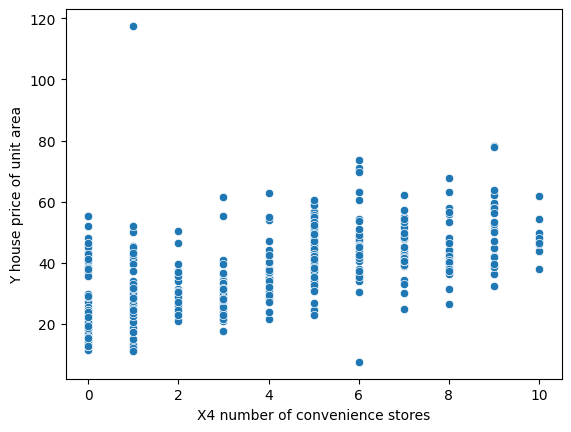

In [ ]:
# plotting a scatterplot
sns.scatterplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df)


variabel fitur (feature variables) dan variabel target (target variable) dalam konteks pemodelan.

In [ ]:
#creating feature variables
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

pembuatan set pelatihan (training set) dan set pengujian (testing set) dalam konteks pemodelan data. Ini adalah langkah penting dalam machine learning untuk memisahkan data menjadi dua bagian yang berbeda untuk melatih dan menguji kinerja model.

In [ ]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

pembuatan model regresi linear menggunakan pustaka scikit-learn (sklearn).

In [ ]:
# craeting a regression model
model = LinearRegression()

tahap pelatihan (fitting) model regresi linear pada data pelatihan.

In [ ]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

langkah ini untuk membuat prediksi menggunakan model regresi linear yang telah dilatih sebelumnya pada data pengujian.

In [ ]:
# making predictions
predictions = model.predict(X_test)

digunakan untuk mengevaluasi kinerja model regresi linear dengan dua metrik evaluasi yang umum digunakan: Mean Squared Error (MSE) dan Mean Absolute Error (MAE).

In [ ]:
# model evaluation
print('mean_s uared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_s uared_error :  46.21179783492909
mean_absolute_error :  5.392293684756193


penggunaan scikit-learn (sklearn) untuk melakukan klasifikasi menggunakan model regresi logistik dengan dataset bunga Iris.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
x = iris.data
y = iris.target

X_train, X_test,\
y_train , y_test = train_test_split('X, y, test_size=0.2, random_state=42')

multi_logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')

multi_logreg.fit(X_train, y_train)

ovr_logreg = LogisticRegression(multi_class='ovr', solver='libinear')

ovr_logreg.fit(X_train, y_train)

melakukan prediksi pada data pengujian menggunakan dua model regresi logistik yang berbeda (multinomial dan One-Versus-Rest) dan untuk mengukur kinerja klasifikasi dengan metrik evaluasi yang berbeda.

In [ ]:
y_pred_multi = multi_logreg.predict(X_test)
y_pred_ovr = ovr_logreg.predict(X_test)

print('Multinomial logistic regression accuracy: ', accuracy_score(y_test, y_pred_multi))
print('One-vs-Rest logistic regressiona accuracy: ', accuracy_score(y_test, y_pred_ovr))

conf_mat_multi = confussion_matrix(y_test, y_pred_multi)
conf_mat_ovr = confussion_matrix(y_test, y_pred_ovr)

membuat visualisasi dari matriks konfusi yang dihasilkan oleh dua model regresi logistik yang berbeda (multinomial dan One-Versus-Rest) dalam dua subplot yang berbeda.

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(conf_mat_multi, cmap=plt.cm.Blues)
axs[0].set_title('Multinomial logistic regression')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_xticks(np.arange(len(iris.target_names)))
axs[0].set_xticklabels(iris.target_names)
axs[0].set_yticklabels(iris.target_names)
axs[0].imshow(conf_mat_ovr, cmap=plt.cm.Blues)
axs[0].set_tittle('One-vs-Rest logistic regression')
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_xticks(np.arange(len(iris.target_names)))
axs[0].set_xticks(iris.target_names)
axs[0].set_yticklabels(iris.target_names)
plt.show()

penggunaan scikit-learn untuk melakukan klasifikasi dengan model regresi logistik pada dataset bunga Iris.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

X = iris.data[:, :2]
y = iris.target

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

clf.fit(X, y)


LogisticRegression(multi_class='multinomial', random_state=0,
                   solver='newton-cg')

membuat visualisasi pemisahan kelas yang diprediksi oleh model regresi logistik pada data yang memiliki dua fitur (panjang sepal dan lebar sepal) dari dataset Iris.

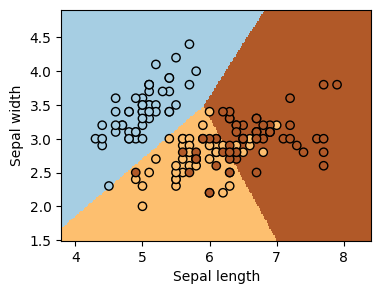

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

pemodelan klasifikasi menggunakan regresi logistik dengan dataset bunga Iris.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris =  load_iris()

X = iris.data[:, :2]
y = iris.target

clf = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear')

clf.fit(X, y)

membuat visualisasi pemisahan kelas yang diprediksi oleh model regresi logistik dengan pendekatan One-Versus-Rest (OvR) pada data yang memiliki dua fitur (panjang sepal dan lebar sepal) dari dataset Iris.

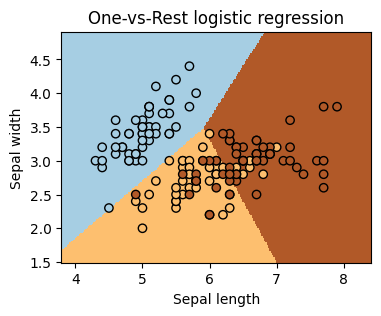

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('One-vs-Rest logistic regression')
plt.show()